In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_csv('C:\\Users\\PC\\Desktop\\Dane\\driving_log.csv',
                names=['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\PC\Desktop\Dane\IMG\center_2019_05_16...,C:\Users\PC\Desktop\Dane\IMG\left_2019_05_16_1...,C:\Users\PC\Desktop\Dane\IMG\right_2019_05_16_...,0.0,0.0,0,0.000002
1,C:\Users\PC\Desktop\Dane\IMG\center_2019_05_16...,C:\Users\PC\Desktop\Dane\IMG\left_2019_05_16_1...,C:\Users\PC\Desktop\Dane\IMG\right_2019_05_16_...,0.0,0.0,0,0.000002
2,C:\Users\PC\Desktop\Dane\IMG\center_2019_05_16...,C:\Users\PC\Desktop\Dane\IMG\left_2019_05_16_1...,C:\Users\PC\Desktop\Dane\IMG\right_2019_05_16_...,0.0,0.0,0,0.000018
3,C:\Users\PC\Desktop\Dane\IMG\center_2019_05_16...,C:\Users\PC\Desktop\Dane\IMG\left_2019_05_16_1...,C:\Users\PC\Desktop\Dane\IMG\right_2019_05_16_...,0.0,0.0,0,0.000022
4,C:\Users\PC\Desktop\Dane\IMG\center_2019_05_16...,C:\Users\PC\Desktop\Dane\IMG\left_2019_05_16_1...,C:\Users\PC\Desktop\Dane\IMG\right_2019_05_16_...,0.0,0.0,0,0.000019


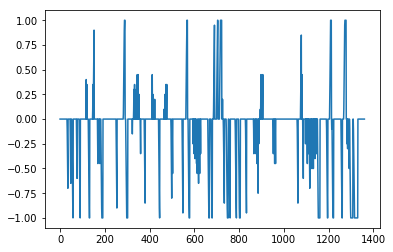

In [10]:
df['steering_angle'].plot()

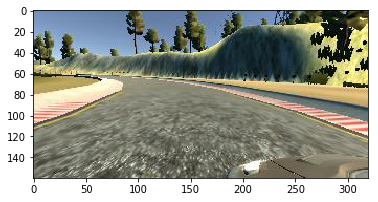

In [11]:
img = Image.open(df['left'][0])
plt.imshow(img)

In [12]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [13]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def process_image(img):
    return img[ 10:130:2, ::4, :]

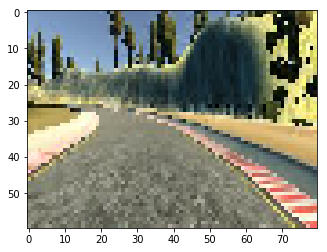

In [14]:
img = process_image(loadImage(df['center'][0]))
plt.imshow(img)

In [15]:
X = [process_image(loadImage(fname)) for fname in df['center']]
X += [process_image(loadImage(fname)) for fname in df['left']]
X += [process_image(loadImage(fname)) for fname in df['right']]

y = np.array(df['steering_angle'].values)
y = np.concatenate([y, y + .4, y - .4])

In [16]:
X = np.array(X)
print(X.shape)
print(y.shape)

(4083, 60, 80, 3)
(4083,)


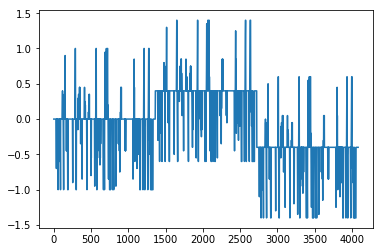

In [17]:
plt.plot(y)
plt.show();

In [18]:
np.save('X.npy', X)
np.save('y.npy', y)